# TP1 Traitement Automatique de la parole

> Répondez aux questions du notebook (dans les cadres CODE et TEXTE). Soyez le plus précis possible et soignez le code.
> Sauvegardez le notebook et ensuite téléchargez le code .ipynb Déposez ce fichier et d'éventuels enregistrements .wav sur la zone de dépot du moodle.
> Ce travail peut-être réalisé en binôme.

**NOM1** : Hani

**Prénom1** : Badreddine

**Email1** : badrhanib@gmail.com        

**NOM2** : Benarib

**Prénom2** : Ilyes

**Email2** : benarib.ilyes@gmail.com

# Initialisation de l'environnement de TP




In [43]:
# OS setup
!cat /etc/os-release
!apt-get install -qq bc tree sox

# Liaison avec les données
!git clone https://github.com/0Pedrh0/Automatic_Speech_Processing.git

PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy
fatal: destination path 'Automatic_Speech_Processing' already exists and is not an empty directory.


In [44]:
import matplotlib.pyplot as plt
import math
import scipy.io.wavfile
import scipy.signal
import numpy as np
from IPython.display import Audio


In [45]:
!ls Automatic_Speech_Processing/tp-3en-n7/signaux/


alpha		Loc1V2norm.wav	Loc2V1.wav
Loc1V1norm.wav	Loc1V2.wav	Vocal_Badreddine.wav
Loc1V1.wav	Loc2V1norm.wav	Vocal_Ilyes.wav


Utilisez la fonction scipy.io.wavfile.read pour charger le signal Loc1V1.wav (localisé ici : tp-3en-n7/signaux/Loc1V1.wav). Renseignez- vous sur l’utilisation de cette fonction en regardant la doumentation en ligne de scipy.io.
**Quelle est la fréquence d’échantillonage de ce fichier ? Est-ce bien en 16 KHz ?**

In [46]:
(fe,signal) = scipy.io.wavfile.read("Automatic_Speech_Processing/tp-3en-n7/signaux/Loc1V1.wav") # Chargement du signal Loc1V1.wav
print(fe, 'Hz') # Fréquence d'échantillonage

16000 Hz


La fréquence d’échantillonage de ce fichier est bien **16 KHz**


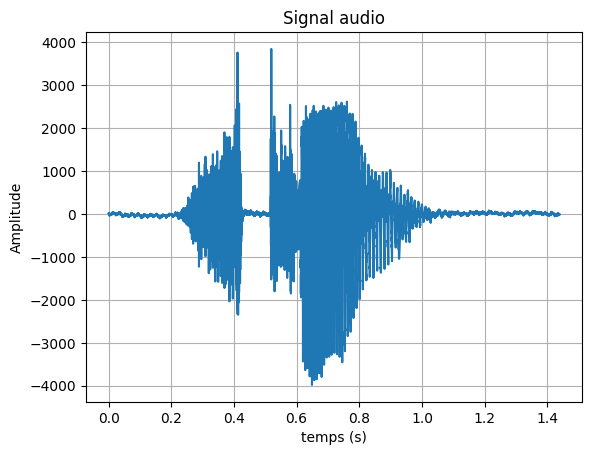

In [47]:
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(len(signal))/fe,signal)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()

In [48]:
# lecture du fichier
Audio(data=signal, rate=fe)

***Affichage d'une partie des échantillons... (entre 9650 et 9700 par exemple)***

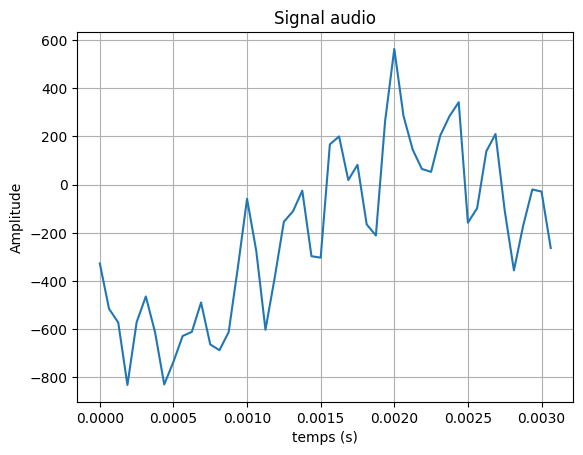

In [49]:
# Affichage des échantillons entre 9650 et 9700
plt.figure(1)
plt.plot(np.arange(9700-9650)/fe,signal[9650:9700])
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()

**Affichage du spectrogramme  :**

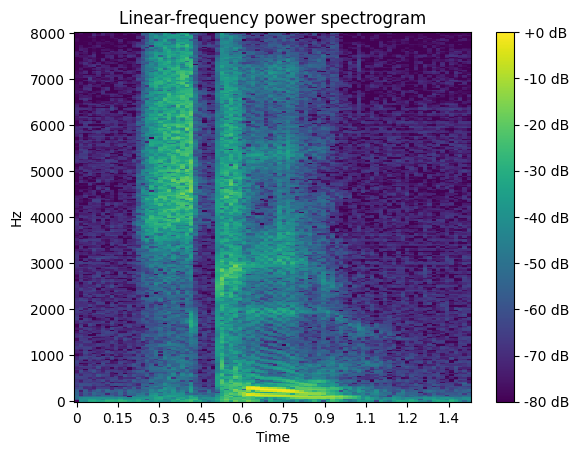

In [50]:
import librosa
import librosa.display
d, sr = librosa.load("Automatic_Speech_Processing/tp-3en-n7/signaux/Loc1V1.wav", sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

La lecture d'un enregistrement à 16 KHz forcée à 8 KHz va donner ceci :

In [51]:
Audio(data=signal, rate=fe/2)

Et la lecture au double de la fréquence ceci :

In [52]:
Audio(data=signal, rate=fe*2)

Q : ***Qu'observez vous au niveau des fréquences contenues dans ces modifications ? Est-ce normal ?***

Lorsqu'on **sous-échantillonne** à *fe/2*, la fréquence du signal est **plus petite** et sa période **plus grande**. Le locuteur semble ainsi parler plus lentement, avec une voix plus grave.

Lorsqu'on **sur-échantillonne** à *2fe*, la fréquence du signal est **plus grande** et sa période **plus petite**. Le locuteur semble ainsi parler plus rapidement, avec une voix plus aigüe.



Q : ***Conformément au théorème de Shannon, une fréquence échantillonnage de 16kHz est-elle adaptée à la numérisation de la parole ? Appuyez vous sur les valeurs théoriques de l’étendue du spectre de la parole.***

Le théorème de Shannon impose une fréquence d'échantillonnage qui vaut au moins 2 fois la fréquence maximale du signal à reconstituer. La fréquence de la parole variant entre 0 et 8000 Hz, une fréquence d'échantillonnage de 16 kHz peut donc être adaptée.   

Q : ***Qu’est ce qu’un phonème ? Combien de phonèmes apparaissent dans le signal Loc1V1 ? Isolez-les dans des variables séparées (nom de la variable = sous vecteur qui contient le son en question). Supprimer les zones de non parole inutiles.***

Un phonème est la plus petite unité distinctive de son dans une langue. On en voit apparaître 3 dans le signal Loc1V1.

In [53]:
phoneme_s = signal[0:math.floor(0.45*fe)+1]
Audio(data=phoneme_s, rate=fe)


In [54]:
phoneme_k = signal[math.floor(0.45*fe)+1:math.floor(0.6*fe)]
Audio(data=phoneme_k, rate=fe)

In [55]:
phoneme_i = signal[math.floor(0.6*fe)+1:fe+1]
Audio(data=phoneme_i, rate=fe)

Q : ***Quelle est la différence entre un son voisé et un son non-voisé ?***

Un son **voisé** comprend une vibration des cordes vocales, et contient donc une fréquence fondamentale, c'est le cas des voyelles par exemple et de quelques consonnes comme [d], [b] ou [v]. Un son **non voisé** est un son qui ne comprend pas de vibration des cordes vocales comme les consonnes [k], [p], et [t].

***Isolez dans des variables séparées une fenêtre (extrait du signal) de 512 points de signal voisé et une autre avec du signal non voisé. Affichez les fenêtres.***

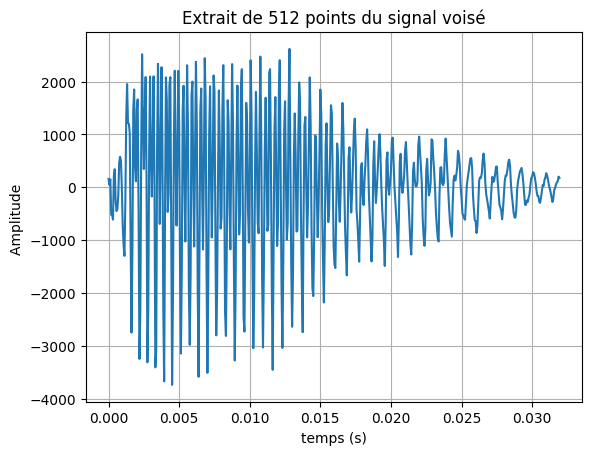

In [56]:
# Prélèvement de 512 points du signal voisé (voyelle [i] pour notre cas)
indices_i = np.round(np.linspace(0,len(phoneme_i)-1,512)).astype(int)
phoneme_i_512 = phoneme_i[indices_i]

# Affichage des 512 échantillons du signal voisé
plt.figure(1)
plt.plot(np.arange(512)/fe,phoneme_i_512)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude ')
plt.title('Extrait de 512 points du signal voisé')
plt.grid(True)
plt.show()



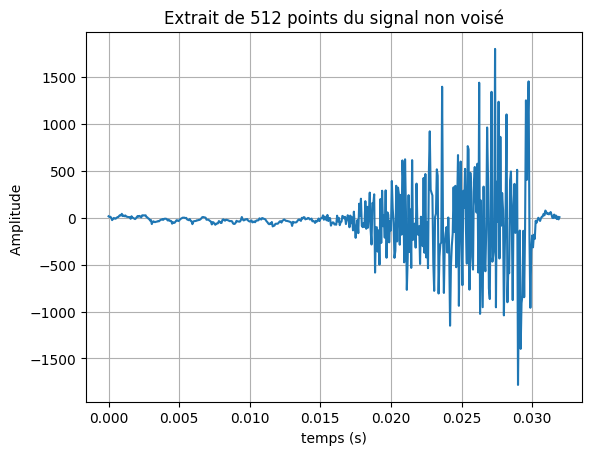

In [57]:
# Prélèvement de 512 points du signal non voisé (consonne [s] pour notre cas)
indices_s = np.round(np.linspace(0,len(phoneme_s)-1,512)).astype(int)
phoneme_s_512 = phoneme_s[indices_s]


# Affichage des 512 échantillons du signal non voisé
plt.figure(1)
plt.plot(np.arange(512)/fe,phoneme_s_512)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude ')
plt.title('Extrait de 512 points du signal non voisé')
plt.grid(True)
plt.show()

***Observez maintenant le signal Loc1V1 entre les échantillons 9650 et 17500. Vous observez alors un unique phonème. Celui-ci peut être séparé en trois zones. Proposez un découpage et justifiez votre choix (par exemple en faisant un lien avec le système de production des sons).***

In [58]:
# Lecture de l'extrait du signal audio
Audio(data=signal[9650:17500], rate=fe)

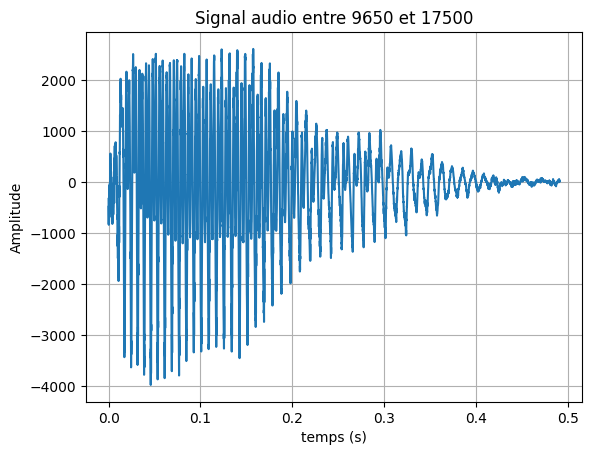

In [59]:
# Affichage des échantillons entre 9650 et 17500
plt.figure(1)
plt.plot(np.arange(17500-9650)/fe,signal[9650:17500])
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio entre 9650 et 17500')
plt.grid(True)
plt.show()

On peut découper le signal en trois parties distinctes :
- Une première partie où l'amplitude croît pour atteindre une valeur maximale (entre 0.0 et 0.02 secondes)
- Une deuxième partie où l'amplitude stagne autour d'une valeur moyenne (entre 0.02 et 0.17 secondes)
- Une troisème partie où l'amplitude décroît (entre 0.2 et 0.4 secondes)

Ce découpage rappelle l'enveloppe *Attack Decay Sustain Release* (ADSR) des synthétiseurs.

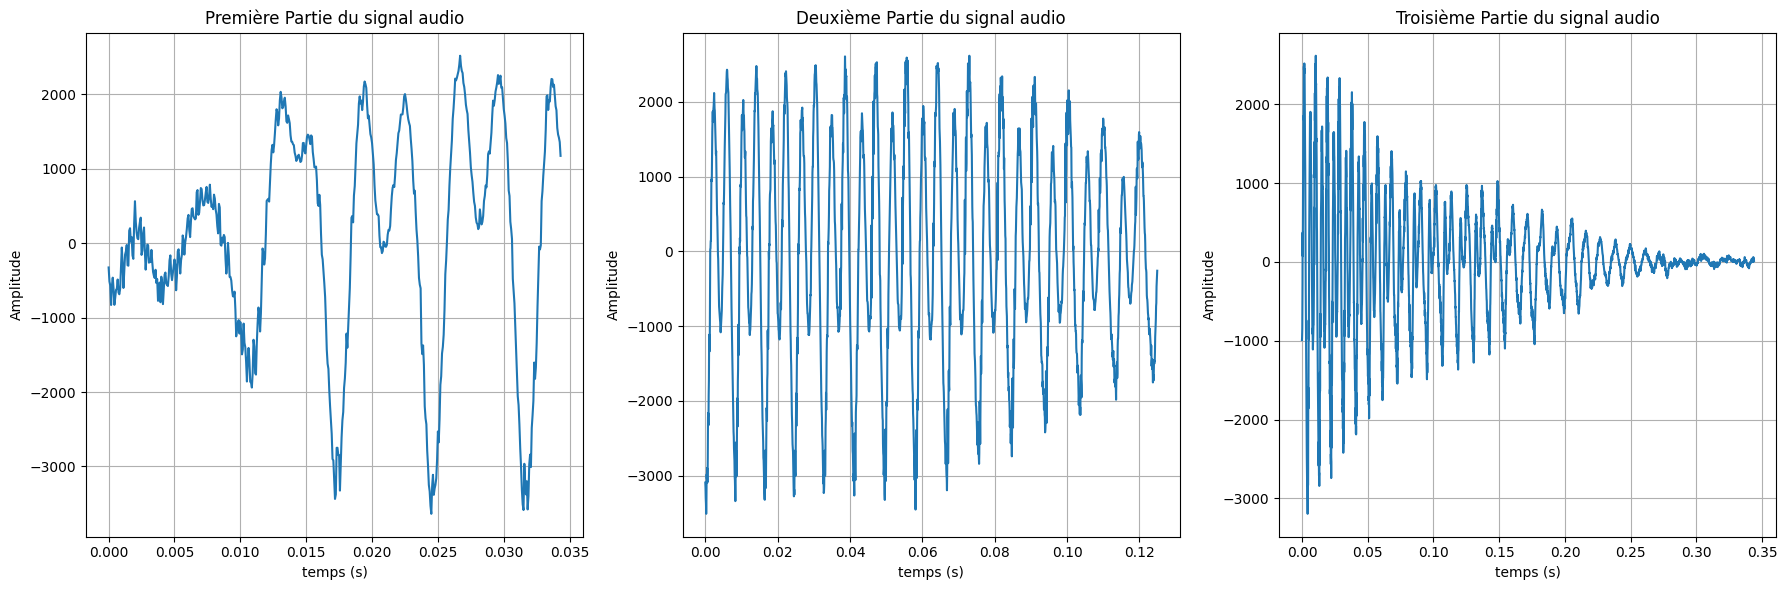

In [60]:
segments = [(9650, 10200), (11000, 13000), (12000, 17500)]
titres = ['Première Partie', 'Deuxième Partie', 'Troisième Partie']

plt.figure(figsize=(18, 6))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(np.arange(segments[i][1]-segments[i][0])/fe,signal[segments[i][0]:segments[i][1]])
    plt.xlabel('temps (s)')
    plt.ylabel('Amplitude')
    plt.title(titres[i] + ' du signal audio')
    plt.grid(True)

plt.tight_layout()
plt.show()

***Le même mot est prononcé une nouvelle fois par le même locuteur : Loc1V2.wav. Affichez les signaux, écoutez les, et observerez les différences existantes entre ces deux réalisations.***

In [61]:
(fe,signal_1) = scipy.io.wavfile.read("Automatic_Speech_Processing/tp-3en-n7/signaux/Loc1V1.wav") # Chargement du signal Loc1V1.wav
(fe,signal_2) = scipy.io.wavfile.read("Automatic_Speech_Processing/tp-3en-n7/signaux/Loc1V2.wav") # Chargement du signal Loc1V2.wav

In [62]:
# Lecture du signal Loc1V1.wav
Audio(data=signal_1, rate=fe)

In [63]:
# Lecture du signal Loc1V2.wav
Audio(data=signal_2, rate=fe)

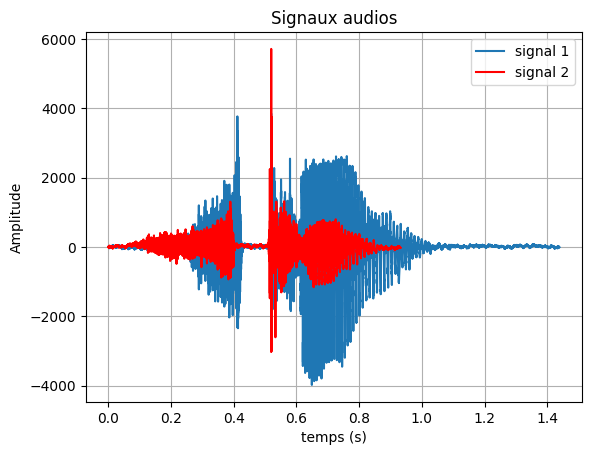

In [64]:
# Affichage des signaux Loc1V1 et Loc2V2
plt.figure(1)
plt.plot(np.arange(len(signal_1))/fe,signal_1)
plt.plot(np.arange(len(signal_2))/fe,signal_2,color='red')

plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signaux audios')
plt.grid(True)
plt.legend(["signal 1","signal 2"])
plt.show()

***Comparez ensuite les réalisation du même mot par deux locuteurs différents (fichiers Loc1V1 et Loc2V1). Discutez les causes possibles des différences observées entre deux réalisations.***

In [65]:
# Chargement du signal Loc2V1.wav
(fe,signal_v2) = scipy.io.wavfile.read("Automatic_Speech_Processing/tp-3en-n7/signaux/Loc2V1.wav")

In [66]:
# Lecture du signal Loc2V1.wav
Audio(data=signal_v2, rate=fe)

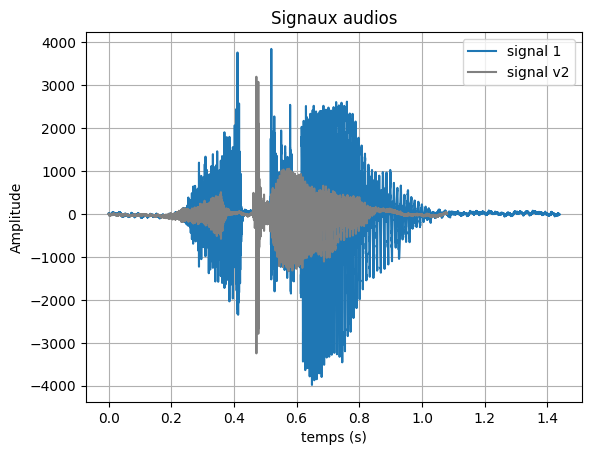

In [67]:
# Affichage des signaux Loc1V1 et Loc2V2
plt.figure(1)
plt.plot(np.arange(len(signal_1))/fe,signal_1)
plt.plot(np.arange(len(signal_v2))/fe,signal_v2,color='grey')

plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signaux audios')
plt.grid(True)
plt.legend(["signal 1","signal v2"])
plt.show()

Votre réponse: On remarque que le signal audio de la deuxième personne est plus faible en amplitude, et dure moins dans le temps que celui de la première personne. On peut en déduire que la deuxième personne s'exprime plus rapidement et moins fort qur la première.

***Enregistrez votre propre voix. Utilisez par exemple cette phrase : "Le public est ému par Debussy". Affichez le signal et son spectrogramme. Analysez les différents phonèmes qui composent votre production : comparez avec ce qui a été fait en cours.***



In [68]:
!ls tp-3en-n7/signaux


ls: cannot access 'tp-3en-n7/signaux': No such file or directory


In [69]:
(fe_badr,signal_badr) = scipy.io.wavfile.read("Automatic_Speech_Processing/tp-3en-n7/signaux/Vocal_Badreddine.wav") # Chargement du vocal de Badreddine
print("Fréquence d'échantillonnage Badreddine: ",fe_badr ,'Hz')

(fe_Ilyes,Signal_Ilyes) = scipy.io.wavfile.read("Automatic_Speech_Processing/tp-3en-n7/signaux/Vocal_Ilyes.wav") # Chargement du vocal de Ilyes
print("Fréquence d'échantillonnage Ilyes : ",fe_Ilyes ,'Hz')

# Réduction de la fréquence d'échantillonnage à 16000 Hz
Signal_Badr_F16 = signal_badr[:-1:3] # On parcourt le signal d'origine avec un pas de 3 pour échantillonner à 16000 Hz
Signal_Ilyes_F16 = Signal_Ilyes[:-1:3]


# Suppression du silence
Nouveau_Signal_Badr = Signal_Badr_F16[round(0.8*fe) : round(3.2*fe)]
Nouveau_Signal_Ilyes = Signal_Ilyes_F16[fe : -1]


Fréquence d'échantillonnage Badreddine:  48000 Hz
Fréquence d'échantillonnage Ilyes :  48000 Hz


In [70]:
# Ecoute du Vocal de Badreddine
Audio(data=signal_badr, rate=fe_badr)

In [71]:
# Ecoute du Vocal d'Ilyes
Audio(data=Signal_Ilyes, rate=fe_Ilyes)

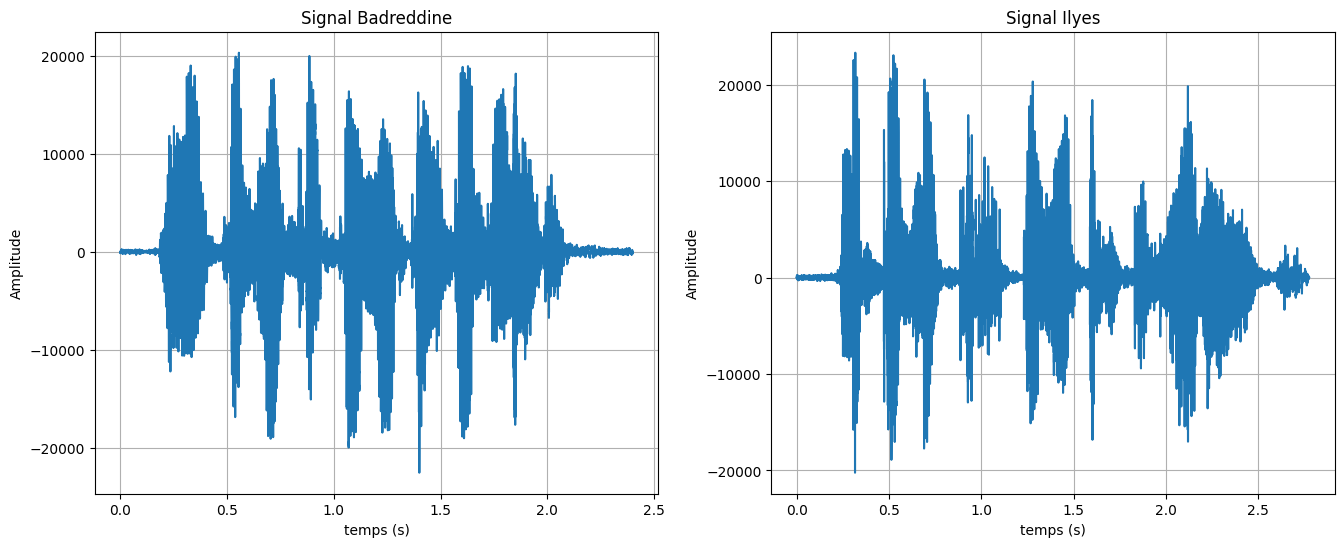

In [72]:
# Affichage des signaux
plt.figure(figsize=(16,6))

# Signal Badreddine
plt.subplot(1,2,1)
plt.plot(np.arange(len(Nouveau_Signal_Badr))/fe,Nouveau_Signal_Badr)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal Badreddine')
plt.grid(True)


# Signal Ilyes
plt.subplot(1,2,2)
plt.plot(np.arange(len(Nouveau_Signal_Ilyes))/fe,Nouveau_Signal_Ilyes)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal Ilyes')
plt.grid(True)



plt.show()

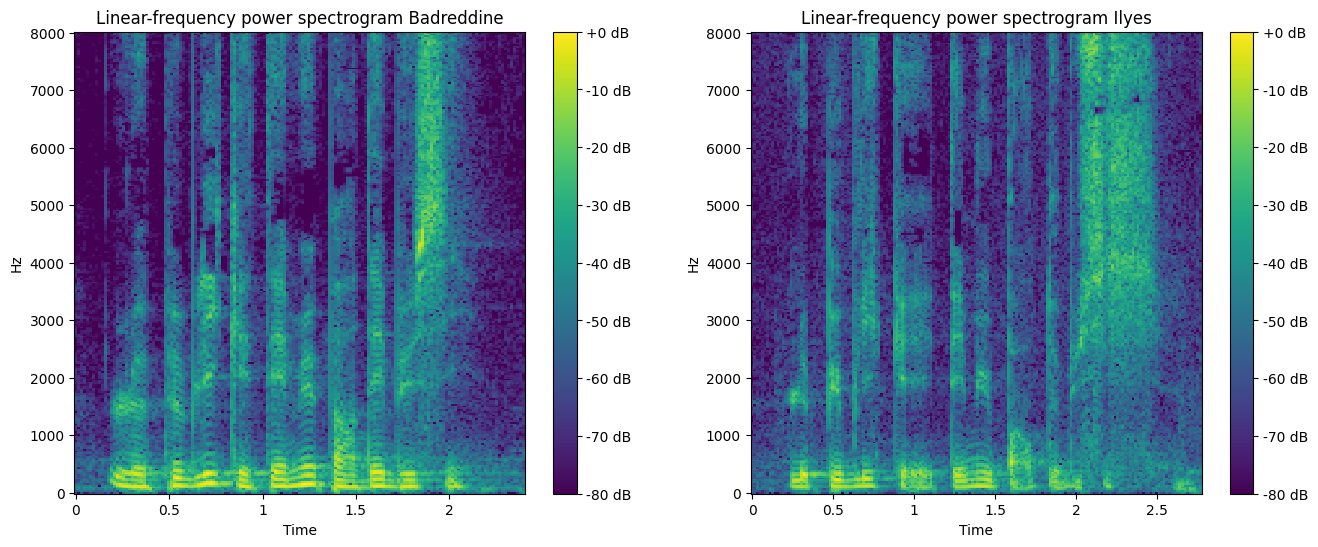

In [73]:
# Affichage des spectrogrammes
plt.figure(figsize=(16,6))


# Spectrogramme Badreddine
plt.subplot(1,2,1)
sp = np.abs(librosa.stft(Nouveau_Signal_Badr.astype(float), n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram Badreddine')

# Spectrogramme Ilyes
plt.subplot(1,2,2)
sp = np.abs(librosa.stft(Nouveau_Signal_Ilyes.astype(float), n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram Ilyes')

plt.show()

***Concluez sur cette partie en prenant en considération le nombre important de causes de variabilité du signal de parole.***

Dans cette partie, nous avons découvert que le signal de parole varie grandement d'une personne à l'autre, voire d'une prononciation à l'autre. Son traitement risque donc de poser en vue de sa grande variabilité. On peut cependant remarquer des similitudes sur l'analyse spectrale des deux enregsitrements, notamment repéré la présence de certaines consonnes commes celle du son [s] venant de la pronociation de "Debussy" à 1.8 secondes pour l'enregsitrement de Badreddine et 2 secondes pour celui d'Ilyes. On peut l'observer en comparant avec le spectrogramme annoté suivant. On remarque également qu'en dénombrant le nombre de voyelles par observation des fondamentales observées, on dénombre le bon nombre de voyelles de chaque coté (10).
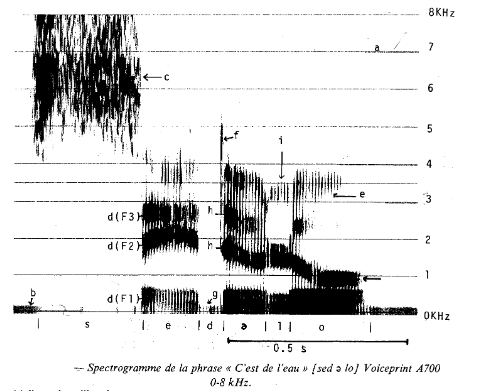